## 분류(클래스 예측)

In [3]:
# MNIST 데이터셋(손글씨 데이터셋) - 총 70000ro, 28*28픽셀 이미지 데이터
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [4]:
# 대부분의 사이킷런 데이터넷은 비슷한 딕셔너리 구조
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X = mnist['data']
X.shape  # 개개의 특성은 0(흰색) ~ 255(검은색)까지의 픽셀 강도

(70000, 784)

In [6]:
y = mnist['target']

y.shape

(70000,)

In [22]:
# 샘플 하나 이미지화 확인
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [23]:
pick_digit = X[:1]
pick_digit

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
pick_digit_img = np.array(pick_digit).reshape(28, 28)
pick_digit_img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

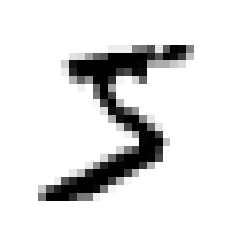

In [28]:
plt.imshow(pick_digit_img, cmap='binary')
plt.axis('off')
plt.show()

In [10]:
y[0]

'5'

In [41]:
import numpy as np

y = y.astype(np.uint8)

In [42]:
# 훈련 데이터 세트와 데스트 데이터 세트 분리

X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [43]:
# 이진 분류 - 5 감지기(5이면 True, 5가 아니면 False)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [44]:
# 분류하기 위한 모델을 선택하여 훈련 - 확률적 경사 하강법 분류기
# : 매우 큰 데이터셋을 효율적으로 처리하는 장점
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [45]:
# 확인
sgd_clf.predict([pick_digit][0])

array([ True])

In [50]:
# 성능측정
# 정확도 측정 도구 : K-겹 교차 검증
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [51]:
from sklearn.base import BaseEstimator

class NeverClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [52]:
never_5_clf = NeverClassifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

In [53]:
# 오차행렬
# cross_val_predict : K-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 가 테스트 폴드에서 얻은 예측을 반환
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [55]:
# 정밀도/재현율
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [56]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [57]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### 다중분류

In [ ]:
'''
# 일반적으로 로직스틱 회귀, 서포트 백터 머신 분류기 등은 이진 분류만 가능 
# SGD, 랜덤 포레스트, 나이브 베이즈 등은 다중 분류 가능
# 그러나 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 많이 사용
> 기법
 OvR 전략(one-versus-the-rest)/OvA(one-versus-all) : 임지를 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택
 OvO 전략(one-versus-one) : 각 이미지가 나타낼 숫자의 조합마다 이진 분류기를 훈련

 - 그래서 보통 대부분의 이진 분류 알고리즘을 사용하는 다중 분류기법은 OvR을 선호
 - sklearn은 알고리즘에 따라서 자동으로 OvR, OvO를 선택해서 실행
'''

In [58]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [59]:
svm_clf.predict([pick_digit][0])

array([5], dtype=uint8)

In [61]:
pick_digit_scores = svm_clf.decision_function([pick_digit][0])
pick_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
# 다중분류기가 클래스를 어떻게 인식하고 있는지
svm_clf.classes_

In [62]:
# 다중분류기 정확도 평가
cross_val_score(svm_clf, X_train, y_train, cv=3,scoring='accuracy')

array([0.977 , 0.9738, 0.9739])

In [ ]:
# SGD로 공부시켜보고 정확도도 평가해보세요 
from sklearn.linear_model import SGDClassifier